In [1]:
# Importing the Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# Importing the Dataset

dataset = pd.read_csv('case_1.csv')

In [3]:
# Viewing the data of last 10 rows to check if the data is imported correctly

dataset.tail(10)

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental
17456,2018,9,30,14,729,1,fall,23.33,57.0,55.0,7.0,0.0,30.3,0.0,0.0,1,1083
17457,2018,9,30,15,721,1,fall,23.89,57.0,53.0,7.0,0.0,30.3,0.0,0.0,1,1101
17458,2018,9,30,16,724,1,fall,24.44,60.0,58.0,8.0,0.0,30.3,0.0,0.0,1,1065
17459,2018,9,30,17,790,1,fall,23.89,61.0,62.0,8.0,0.0,30.3,0.0,0.0,1,1079
17460,2018,9,30,18,648,1,fall,23.33,61.0,64.0,9.0,0.0,30.3,0.0,0.0,1,887
17461,2018,9,30,19,416,1,fall,21.67,60.0,68.0,5.0,0.0,30.3,0.0,0.0,2,541
17462,2018,9,30,20,278,1,fall,21.67,61.0,70.0,3.0,0.0,30.3,0.0,0.0,2,379
17463,2018,9,30,21,233,1,fall,21.11,62.0,76.0,6.0,0.0,30.3,0.0,0.0,2,301
17464,2018,9,30,22,148,1,fall,20.00,63.0,84.0,8.0,0.0,30.3,0.0,0.0,2,203
17465,2018,9,30,23,83,1,fall,20.00,62.0,81.0,7.0,0.0,30.3,0.0,0.0,1,113


In [4]:
#Checking the datatype of the variables

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         17466 non-null  int64  
 1   month        17466 non-null  int64  
 2   day          17466 non-null  int64  
 3   hour         17466 non-null  int64  
 4   member       17466 non-null  int64  
 5   weekend      17466 non-null  int64  
 6   season       17466 non-null  object 
 7   temperature  17466 non-null  float64
 8   dewpoint     17466 non-null  float64
 9   humidity     17466 non-null  float64
 10  windspeed    17466 non-null  float64
 11  windgust     17466 non-null  float64
 12  pressure     17466 non-null  float64
 13  precip       17466 non-null  float64
 14  precipaccum  17466 non-null  float64
 15  weather      17466 non-null  int64  
 16  rental       17466 non-null  int64  
dtypes: float64(8), int64(8), object(1)
memory usage: 2.3+ MB


In [5]:
# Converting the some of the numerical variables into categorical variables

cols = ['year','month','day','hour','weekend','season','weather']

for col in cols:
    dataset[col] = dataset[col].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         17466 non-null  category
 1   month        17466 non-null  category
 2   day          17466 non-null  category
 3   hour         17466 non-null  category
 4   member       17466 non-null  int64   
 5   weekend      17466 non-null  category
 6   season       17466 non-null  category
 7   temperature  17466 non-null  float64 
 8   dewpoint     17466 non-null  float64 
 9   humidity     17466 non-null  float64 
 10  windspeed    17466 non-null  float64 
 11  windgust     17466 non-null  float64 
 12  pressure     17466 non-null  float64 
 13  precip       17466 non-null  float64 
 14  precipaccum  17466 non-null  float64 
 15  weather      17466 non-null  category
 16  rental       17466 non-null  int64   
dtypes: category(7), float64(8), int64(2)
memory usage: 1.5 MB


In [6]:
#Checking the datatype of the variables  

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17466 entries, 0 to 17465
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         17466 non-null  category
 1   month        17466 non-null  category
 2   day          17466 non-null  category
 3   hour         17466 non-null  category
 4   member       17466 non-null  int64   
 5   weekend      17466 non-null  category
 6   season       17466 non-null  category
 7   temperature  17466 non-null  float64 
 8   dewpoint     17466 non-null  float64 
 9   humidity     17466 non-null  float64 
 10  windspeed    17466 non-null  float64 
 11  windgust     17466 non-null  float64 
 12  pressure     17466 non-null  float64 
 13  precip       17466 non-null  float64 
 14  precipaccum  17466 non-null  float64 
 15  weather      17466 non-null  category
 16  rental       17466 non-null  int64   
dtypes: category(7), float64(8), int64(2)
memory usage: 1.5 MB


In [7]:
#Looking for the descriptive statstics of the dataset
dataset.describe()

,member,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,rental
count,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000,17466.000000
mean,317.602657,15.557475,47.166089,65.172028,8.811951,3.095630,30.047717,0.003403,0.003845,420.144910
std,315.397551,9.794618,19.570545,19.549624,5.104676,8.664425,0.390741,0.029175,0.065460,402.473513
min,0.000000,-12.780000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,63.000000,7.780000,32.000000,49.000000,6.000000,0.000000,29.900000,0.000000,0.000000,77.000000
50%,244.000000,16.670000,50.000000,66.000000,8.000000,0.000000,30.000000,0.000000,0.000000,315.500000
75%,455.750000,23.890000,64.310000,82.000000,12.000000,0.000000,30.200000,0.000000,0.000000,634.000000
max,1639.000000,36.110000,80.000000,100.000000,44.000000,59.000000,30.800000,1.320000,4.000000,2038.000000


In [8]:
#Getting output of all the columns
dataset.columns

Index(['year', 'month', 'day', 'hour', 'member', 'weekend', 'season',
       'temperature', 'dewpoint', 'humidity', 'windspeed', 'windgust',
       'pressure', 'precip', 'precipaccum', 'weather', 'rental'],
      dtype='object')

In [9]:
#Counting the missing values in data.
dataset.isna().sum()

year           0
month          0
day            0
hour           0
member         0
weekend        0
season         0
temperature    0
dewpoint       0
humidity       0
windspeed      0
windgust       0
pressure       0
precip         0
precipaccum    0
weather        0
rental         0
dtype: int64

In [10]:
# Checking for Duplicate Values
duplicates =len(dataset[dataset.duplicated()])
print(duplicates)

0


# EDA

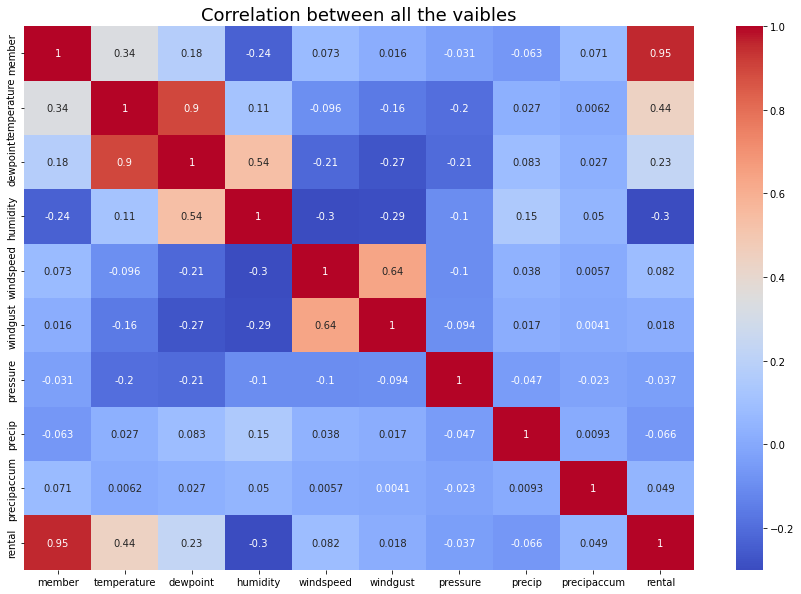

In [11]:
#Heatmap for co-relation in between the numerical features
plt.figure(figsize=(15, 10))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between all the vaibles', size=18)
plt.show()

# Demand is driven majorly by 3 factors Temperature, dew point and humidity Temperature and dew point are positively correlated which means that with increase in the temperature the number of rental increases The humidity is negatively correlated with the target variable

In [12]:
#Adding one more row, Number of Non-Members
dataset['non member'] = dataset['rental'] - dataset['member']
dataset.head()

,year,month,day,hour,member,weekend,season,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,weather,rental,non member
0,2016,10,1,0,80,1,fall,18.33,65.0,100.0,6.0,0.0,30.1,0.0,0.0,3,103,23
1,2016,10,1,1,53,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,63,10
2,2016,10,1,2,27,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.0,0.0,3,33,6
3,2016,10,1,3,20,1,fall,17.78,64.0,100.0,10.0,0.0,30.1,0.1,0.0,3,23,3
4,2016,10,1,4,11,1,fall,17.78,64.0,100.0,9.0,0.0,30.1,0.0,0.0,3,11,0


# Exploratory Data Analysis

[Text(0.5, 1.0, 'Rental bikes acording to Month ')]

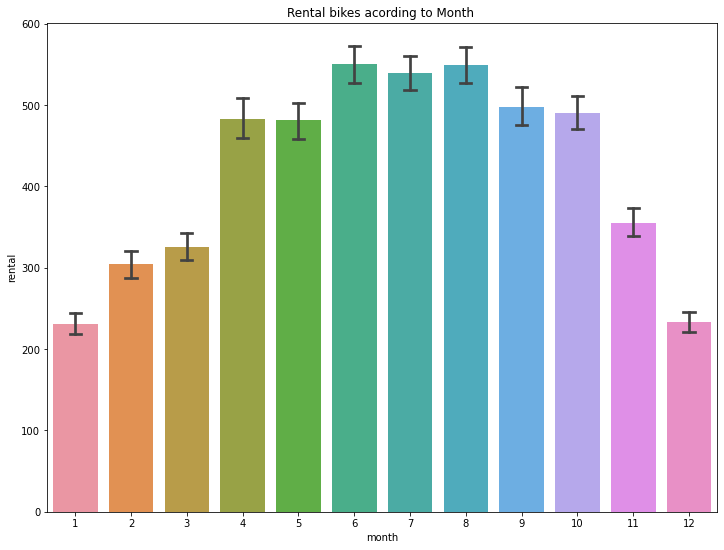

In [59]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(12,9))
sns.barplot(data=dataset,x='month',y='rental',ax=ax,capsize=.2)
ax.set(title='Rental bikes acording to Month ')

#From the bar plot we can clearly say that from the month 4 to 10 the demand of the rented bike is high as compare to other months.

[Text(0.5, 1.0, 'Rentals during different Season')]

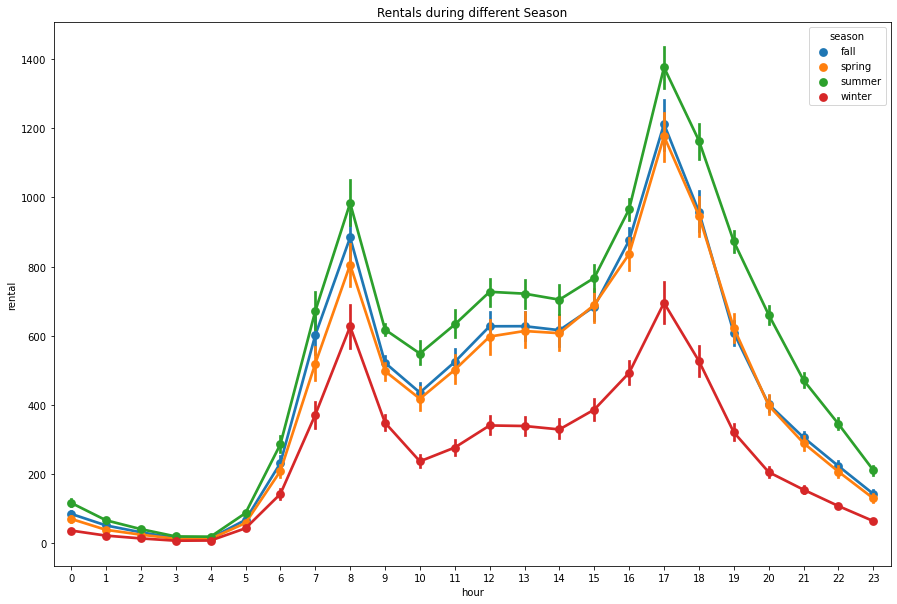

In [14]:
#anlysis of data by vizualisation
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=dataset, x='hour', y='rental', hue='season',ax=ax)
ax.set(title='Rentals during different Season')

# 1. From the bar graph we can conclude that the demand of the bicycles is highest during the summer and least during winters. 
# 2. The trend pattern runs same in all the seasons, demand is more during office hours 6 AM - 8 AM and 4 PM - 6 PM (assuming it to be office time)    

[Text(0.5, 1.0, 'Rental during different hours during weekdays and weekend at different hours')]

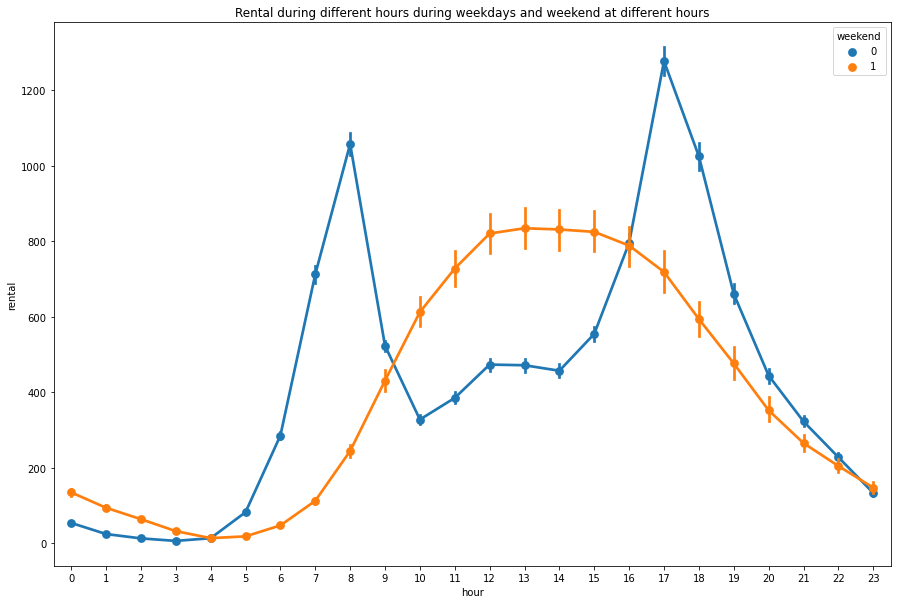

In [60]:
#anlysis of data by vizualisation
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=dataset, x='hour', y='rental', hue='weekend',ax=ax)
ax.set(title='Rental during different hours during weekdays and weekend at different hours')

# The graphs depicts the hourly demand during weekdays and weekend.
# The demand during weekdays is during 6 AM - 8 AM & 3 PM - 5 PM (Assuming it to be during office Time)
# The demand during weekend is during from 9 AM - 4 PM (Casul Trips)

[Text(0.5, 1.0, 'Registered members during weekdays and weekend')]

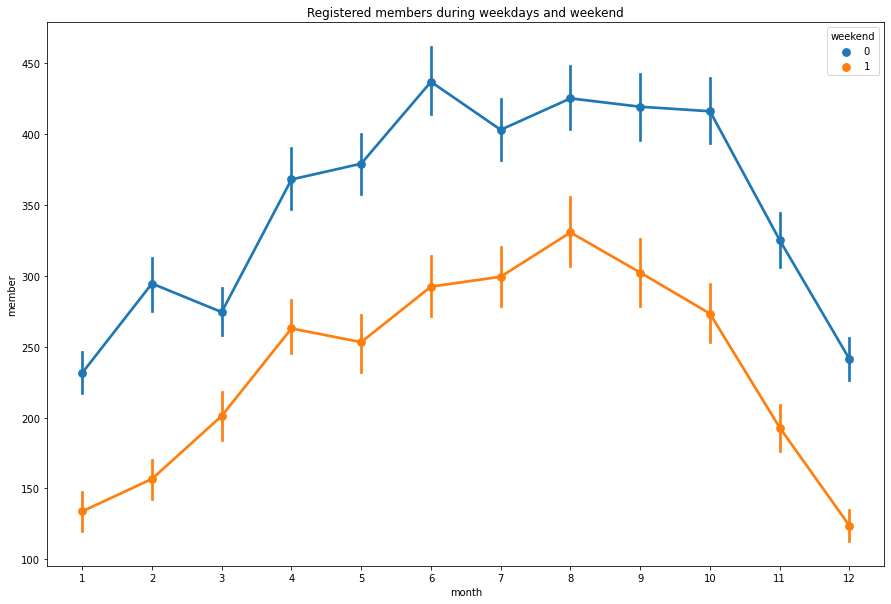

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=dataset, x='month', y='member',hue='weekend',ax=ax)
ax.set(title='Registered members during weekdays and weekend')

# The rental pattern is almost similar during the year for weekend and weekdays.
# The rental picks up from March and have an increasing trend till June - July (During Summer Months) 

[Text(0.5, 1.0, 'Registered non members during weekdays and weekend')]

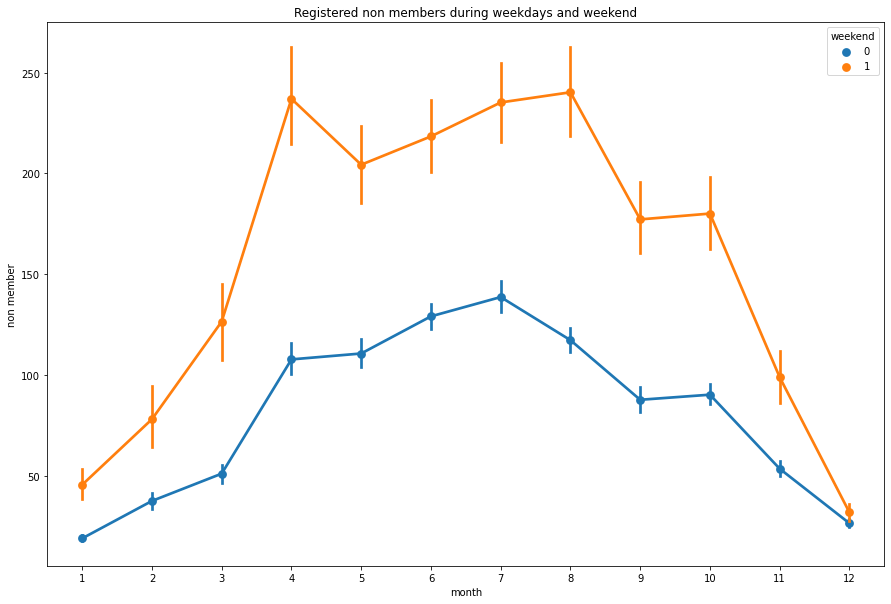

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
sns.pointplot(data=dataset, x='month', y='non member',hue='weekend',ax=ax)
ax.set(title='Registered non members during weekdays and weekend')

# The number of non members are higher during weekends in comparision to weekdays (more casual rides during weekends).
# The rental pattern is almost similar during weekdays and weekend during the year.

[Text(0.5, 1.0, 'Members during months')]

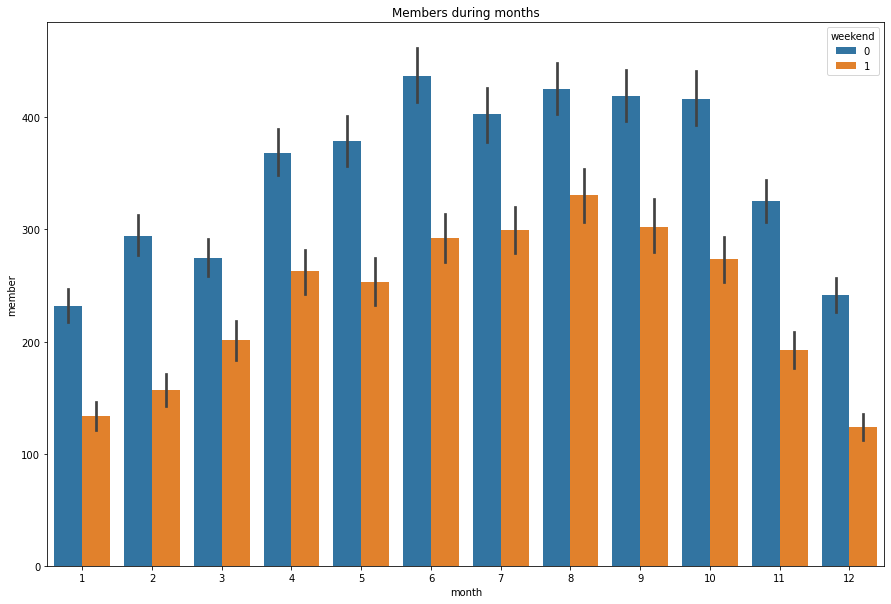

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(data=dataset, x='month', y='member',hue='weekend',ax=ax)
ax.set(title='Members during months')

# It is evident from the graph that the members are more active during weekdays. 
# We can make an assumption that people travelling to commute to the office have taken the membership. 

<AxesSubplot:xlabel='season', ylabel='rental'>

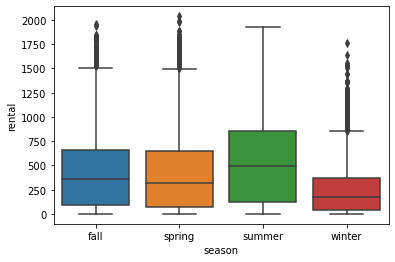

In [20]:
sns.boxplot(x='season', y='rental', data=dataset)
# Check  the outliers for the rentals

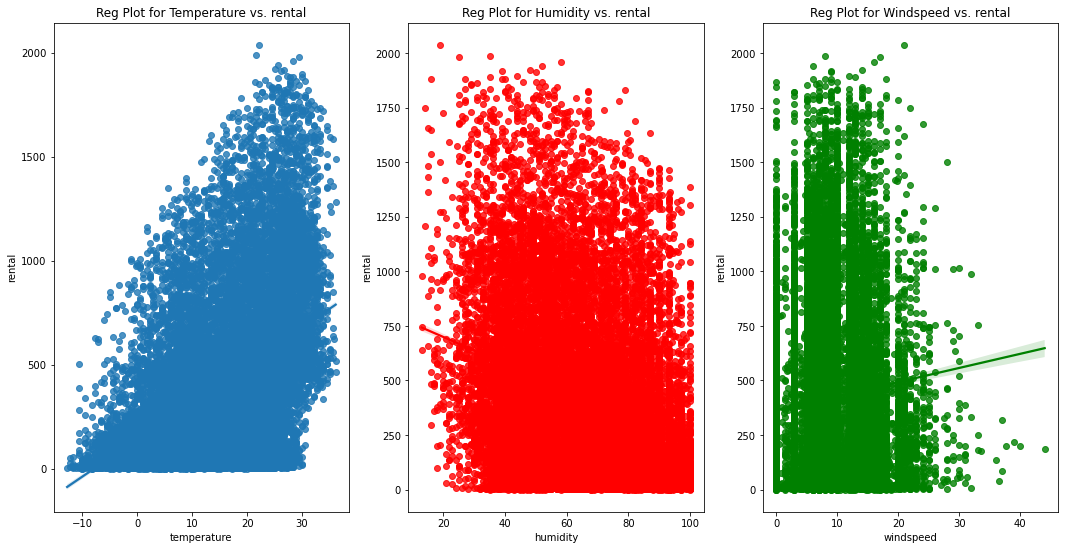

In [21]:
# Regression Plots with respect to Temperature, Humidity and Windspeed
fig = plt.figure(figsize=(18, 9))
axes = fig.add_subplot(1, 3, 1)
sns.regplot(data=dataset, x='temperature', y='rental',ax=axes)
axes.set(title='Reg Plot for Temperature vs. rental')
axes = fig.add_subplot(1, 3, 2)
sns.regplot(data=dataset, x='humidity', y='rental',ax=axes, color='r')
axes.set(title='Reg Plot for Humidity vs. rental')
axes = fig.add_subplot(1, 3, 3)
sns.regplot(data=dataset, x='windspeed', y='rental',ax=axes, color='g')
axes.set(title='Reg Plot for Windspeed vs. rental')
plt.show()

# From the plot we can see that with increase in temperature, the rental increases and the reverse effect is seen in humidity. 

In [22]:
# Defining the numerical columns
numerical_columns=['rental','temperature','humidity','windspeed','pressure']

C:\Users\hemil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hemil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hemil\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

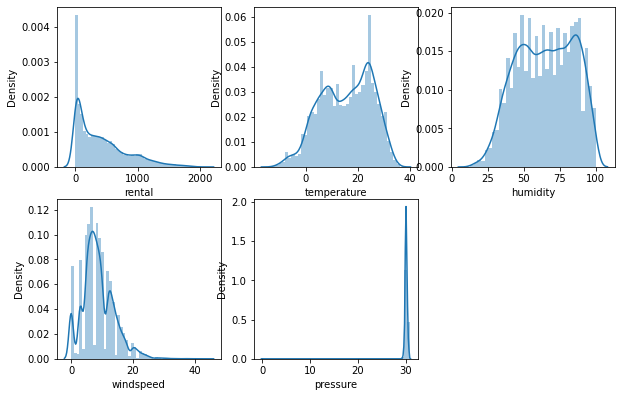

In [23]:
# checking the distribution for the numerical columns
plt.figure(figsize=(10,10))
for index,item in enumerate(numerical_columns):
  plt.subplot(3,3,index+1)
  sns.distplot(dataset[item])

In [24]:
# creating dummy variables for categorical feature --> Seasons, month, day, hour, weekend weather.
# Dropping the columns for which the dummy variables are created & again checking if dummy variable is created. 

dataset_OneHotEncoding = dataset

def one_hot_encoding(dataset,column):
    dataset=pd.concat([dataset,pd.get_dummies(dataset[column], prefix=column)], axis=1)
    dataset=dataset.drop([column],axis=1)
    return dataset

cols = ['season','month','day','hour','weekend','weather']

for col in cols:
    dataset_OneHotEncoding = one_hot_encoding(dataset_OneHotEncoding,col)
dataset_OneHotEncoding.head(10)

,year,member,temperature,dewpoint,humidity,windspeed,windgust,pressure,precip,precipaccum,...,hour_20,hour_21,hour_22,hour_23,weekend_0,weekend_1,weather_1,weather_2,weather_3,weather_4
0,2016,80,18.33,65.0,100.0,6.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
1,2016,53,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
2,2016,27,17.78,64.0,100.0,10.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
3,2016,20,17.78,64.0,100.0,10.0,0.0,30.1,0.10,0.0,...,0,0,0,0,0,1,0,0,1,0
4,2016,11,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
5,2016,14,17.78,64.0,100.0,9.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
6,2016,38,17.78,64.0,100.0,12.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
7,2016,104,17.78,64.0,100.0,13.0,0.0,30.1,0.00,0.0,...,0,0,0,0,0,1,0,0,1,0
8,2016,133,17.78,64.0,100.0,14.0,0.0,30.1,0.00,0.2,...,0,0,0,0,0,1,0,0,1,0
9,2016,145,17.78,63.5,98.0,9.0,0.0,30.1,0.05,0.0,...,0,0,0,0,0,1,0,0,1,0


In [25]:
# dropping the value which has less correlation with the target variables & checking the values of X

x = dataset_OneHotEncoding.drop(columns=['year','windspeed','windgust','pressure','precip','precipaccum','rental','member', 'non member'], axis =1)
print(x)

       temperature  dewpoint  humidity  season_fall  season_spring  \
0            18.33      65.0     100.0            1              0   
1            17.78      64.0     100.0            1              0   
2            17.78      64.0     100.0            1              0   
3            17.78      64.0     100.0            1              0   
4            17.78      64.0     100.0            1              0   
...            ...       ...       ...          ...            ...   
17461        21.67      60.0      68.0            1              0   
17462        21.67      61.0      70.0            1              0   
17463        21.11      62.0      76.0            1              0   
17464        20.00      63.0      84.0            1              0   
17465        20.00      62.0      81.0            1              0   

       season_summer  season_winter  month_1  month_2  month_3  ...  hour_20  \
0                  0              0        0        0        0  ...        0   

In [26]:
# Defining Y (dependent variable)
y = dataset_OneHotEncoding['rental']
print(y)

0        103
1         63
2         33
3         23
4         11
        ... 
17461    541
17462    379
17463    301
17464    203
17465    113
Name: rental, Length: 17466, dtype: int64


In [27]:
# Checking X 
x.head()

,temperature,dewpoint,humidity,season_fall,season_spring,season_summer,season_winter,month_1,month_2,month_3,...,hour_20,hour_21,hour_22,hour_23,weekend_0,weekend_1,weather_1,weather_2,weather_3,weather_4
0,18.33,65.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,17.78,64.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,17.78,64.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,17.78,64.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
4,17.78,64.0,100.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [28]:
#Create testing and training data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
print(x_train.shape)
print(x_test.shape)

(13972, 80)
(3494, 80)


In [29]:
# standardizing the independent variables
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train.iloc[:, 0:3] = sc.fit_transform(x_train.iloc[:, 0:3].values)
x_test.iloc[:, 0:3] = sc.transform(x_test.iloc[:, 0:3].values)

In [30]:
# checking x_test
print(x_test)

       temperature  dewpoint  humidity  season_fall  season_spring  \
12317    -1.016537 -0.667329  0.402785            0              0   
2361     -2.094281 -1.686998  0.146960            0              0   
3932     -1.489071 -0.794788  1.366220            0              1   
5938      0.854206  1.117091  0.863269            0              0   
10766    -0.847119 -0.769296 -0.262359            0              0   
...            ...       ...       ...          ...            ...   
16311     0.854206  1.219058  1.119094            0              0   
1169      0.343911 -0.157495 -1.029833            1              0   
14883     0.854206  0.352340 -0.876339            0              0   
11436    -1.300261 -0.718313  1.067929            0              0   
5426     -0.166385 -0.769296 -1.336823            0              1   

       season_summer  season_winter  month_1  month_2  month_3  ...  hour_20  \
12317              0              1        0        1        0  ...        0   

# Linear Regression Model

In [31]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred_lr = regressor.predict(x_test)
np.set_printoptions(precision=2)

In [34]:
# Checking the efficiency of the model.
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error(y_test,y_pred_lr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(y_test,y_pred_lr)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_lr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

# The Liner model regression can accurately predict 71% variability of the data

MSE : 47353.36937497614
RMSE : 217.60829344254353
R2 : 0.719163648082115
Adjusted R2 :  0.7125809032378634


# Random Forest Regressor

In [35]:
# Importing Linear Regression Model
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(x_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
y_pred_rfr = regressor.predict(x_test)
np.set_printoptions(precision=2)
print(y_pred_rfr)

[  12.5  140.8   66.8 ... 1339.   202.9   14.7]


In [39]:
# Checking the efficiency of the model.
MSE  = mean_squared_error(y_test,y_pred_rfr)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(y_test,y_pred_rfr)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(y_test,y_pred_rfr))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)))

# The Random forest regressor model can accurately predict 90% variability of the data


MSE : 15077.479785346308
RMSE : 122.79038962942624
R2 : 0.9105807152707083
Adjusted R2 :  0.9084847461003762


# Recommendation for meeting the fluctuating demand  